In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h2> What are edge kernels ?</h2>

Kernels are used to calculate gradients along some direction. As we know that, the intensity profiles have some gradients if the pixels show a non-constant intensity along some direction. This knowledge can be used to calculate the gradients along the x-axis and the y-axis of a pixel. The vector of these two gradients is called gradient vector, which gives the resultant gradient of the pixel. To obtain a gradient image, we need to calculate the x component and the y-component of the gradient vector for each pixel in the image. Image which is made up of the x-components represents the horizontal edges while the image made with the y-components represents the vertical edges. Edge kernels are designed in such a way that they do this operation automatically without explicit hardwiring. 1-D kernels can calculate horizontal and vertical gradients. For diagonal gradients, we need 2D Kernels. But, these kernels are not as effective as compared to the kernels which are symmetric about the center pixel. 3X3 is the smallest possible kernel which obeys this 

<h2> Popular edge kernels</h2>

<h2> (a) Prewitt Kernel </h2>

<img src = "https://www.researchgate.net/profile/S-N-Kumar/publication/317754223/figure/fig3/AS:565335482351616@1511797890242/Masks-for-the-Prewitt-gradient-edge-detector-The-Laplacian-operator-is-based-on-second.png"/>

The $G_x$ kernel calculates the gradient along the x-direction and the $G_y$ kernel calculates the gradient along the y direction.

<b>Note:</b> We consider x direction as going from top to bottom and y as left to right. In the above image, both the G's are swapped as opposed to our convention.

This can we written as:

$$g_x = \frac{\delta f}{\delta x} = (z_1 + z_2 + z_3) - (z_7 + z_8 + z_9)$$
$$g_y = \frac{\delta f}{\delta y} = (z_3 + z_6 + z_9) - (z_1 + z_4 + z_7)$$

This filter is then convolved through the whole image.

Let's implement this.

In [5]:
def create_prewitt_kernel():
    '''
    Function to create a 3*3 prewitt kernel.
    Returns two prewitt kernels for g_x and g_y
    '''
    g_x = []
    g_y = []
    
    #create first kernel
    for i in range(3):
        g_x.append([i - 1, i - 1, i - 1])
        g_y.append([0, 0, 0])
        
    #create second kernel
    for i in range(3):
        g_y[i][0], g_y[i][1], g_y[i][2] = g_x[0][i], g_x[1][i], g_x[2][i]
        
    return (np.array(g_x), np.array(g_y))
    

g_x, g_y = create_prewitt_kernel()

print(f'G_x is {g_x}')
print(f'G_y is {g_y}')
    

G_x is [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
G_y is [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


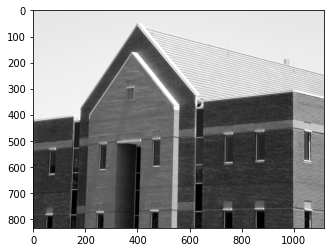

In [6]:
#load image
image = cv2.cvtColor(cv2.imread('./images/house.tif'), cv2.COLOR_BGR2GRAY)

plt.imshow(image, cmap = 'gray', vmin = 0, vmax = 255)

In [7]:
from math import ceil

def apply_padding(image, kernel_size):
    im = image.copy()
    padding_size = ceil(kernel_size / 2) - 1
    
    #vertical_padding
    vert_pad = np.zeros((padding_size, image.shape[1]))
    im = np.vstack((np.vstack((vert_pad, im)), vert_pad))
    
    #horizontal padding
    horiz_pad = np.zeros(((image.shape[0] + padding_size * 2), padding_size))
    im = np.hstack((np.hstack((horiz_pad, im)), horiz_pad))
    
    return im

def convolve(image:np.ndarray, kernel:np.ndarray, padding:bool = False):
    '''
    Apply convolution operation on an image given a filter
    '''
    im = image.copy()
    im_x = 0
    im_y = 0
    if padding == True:
        im = apply_padding(image, kernel.shape[0])
        im_x = ceil(kernel.shape[0] / 2) -1
        im_y = ceil(kernel.shape[0] / 2) - 1
    #apply convolution
    for row in range(im_x, im_x + image.shape[0] - 1):
        for col in range(im_y, im_y + image.shape[1] -1):
            image_slice = im[row: row + kernel.shape[0], col: col + kernel.shape[0]]
            conv_res = np.sum(image_slice * kernel)
            im[row, col] = np.abs(conv_res)
            
    return im

            
            
            
        
        
    

In [8]:
res_x = convolve(image, g_x, True)

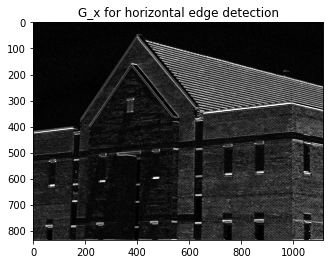

In [9]:
plt.title("G_x for horizontal edge detection")
plt.imshow(res_x, cmap = 'gray', vmin = 0, vmax = 255)

In [10]:
res_y = convolve(image, g_y, True)

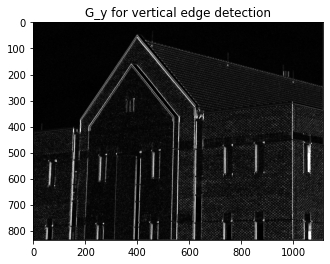

In [11]:
plt.title("G_y for vertical edge detection")
plt.imshow(res_y, cmap = 'gray', vmin = 0, vmax = 255)

<p> As we can see here that there are many erroneous gradients, which we need to remove. This is done by removing pixels with a threshold so that only high gradient pixels are present</p>

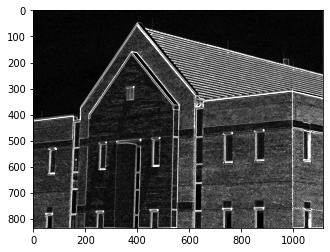

In [12]:
#calculating magnitude gradient
magnitude = res_x + res_y

plt.imshow(magnitude, cmap = 'gray', vmin = 0, vmax = 255)

<h2> Sobel Filter </h2>

Similar to Prewitt filter just 2 is added in between the ones. This provides some image smoothing.

<b> Benefits:</b>

<ul><li>Noise Suppression</li></ul>

In [18]:
#detect dark to bright transition. but convolution is already modified to handle both transitions
sobel_X = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_Y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])



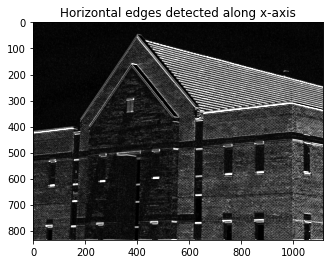

In [20]:
res_x = convolve(image, sobel_X, True)

plt.title("Horizontal edges detected along x-axis")
plt.imshow(res_x, cmap = 'gray', vmin = 0, vmax = 255)

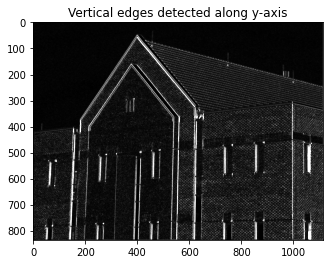

In [21]:
res_y = convolve(image, sobel_Y, True)
plt.title("Vertical edges detected along y-axis")
plt.imshow(res_y, cmap = 'gray', vmin = 0, vmax = 255)

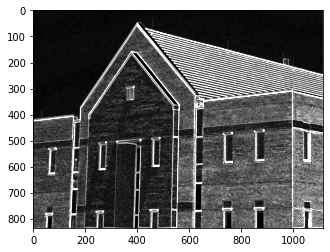

In [22]:
#magnitude image
mag_img = res_x + res_y

plt.imshow(mag_img, cmap = 'gray', vmin = 0, vmax = 255)

<p> We can see that the edges detected using x-gradients are very horizontal and edges detected using y-gradients are very vertical. This means that we can confirm again that edges are orthogonal to the gradients.

<p> Even by using absolute values to calculate magnitude vector, we get isotropic images because sobel and prewitt operators are isotropic for vertical and horizontal edges no matter how the magnitude of vector is calculated.
Isotropic means less prone to bias for specific conditions.</p>

<h2> Kirsch Compass Kernels </h2>

<img src = "https://www.researchgate.net/profile/Ching-Wei-Wang-3/publication/221472523/figure/fig2/AS:305540338077697@1449857901083/Kirsch-Compass-Operators.png"/>

<p> The only thing different in these kernels is that the magnitude of gradient at a pixel is equal to the maxima of all the gradients calculated using the different operators.</p>

In [39]:
#we will follow book for creating these kernels
def create_kirsch_kernels():
    return [np.array([[-3, -3,5], [-3, 0, 5], [-3, -3, 5]]),
           np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]]),
           np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]]),
           np.array([[5, 5, -3], [5, 0, -3], [-3, -3, -3]]),
           np.array([[5, -3, -3], [5, 0, -3], [5, -3, -3]]),
           np.array([[-3, -3, -3], [5, 0, -3], [5, 5, -3]]),
           np.array([[-3, -3, -3], [-3, 0, -3], [5, 5, 5]]),
           np.array([[-3, -3, -3], [-3, 0, 5], [-3, 5, 5]])]

def kirsch_convolve(image:np.ndarray, kernels:list, padding:bool = False):
    '''
    Apply convolution operation on an image given kirsch filter
    '''
    im = image.copy()
    im_x = 0
    im_y = 0
    if padding == True:
        im = apply_padding(image, kernels[0].shape[0])
        im_x = ceil(kernels[0].shape[0] / 2) -1
        im_y = ceil(kernels[0].shape[0] / 2) - 1
    #apply convolution
    for row in range(im_x, im_x + image.shape[0] - 1):
        for col in range(im_y, im_y + image.shape[1] -1):
            image_slice = im[row: row + kernels[0].shape[0], col: col + kernels[0].shape[0]]
            convs = np.array([np.sum(image_slice * kernel) for kernel in kernels])
            im[row, col] = np.amax(convs)
            
    return im
    

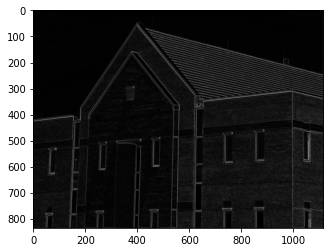

In [43]:
filters = create_kirsch_kernels()

res = kirsch_convolve(image, filters, padding = True)

plt.imshow(res, cmap = 'gray')


<h2> Edge detection in presence of smoothing </h2>

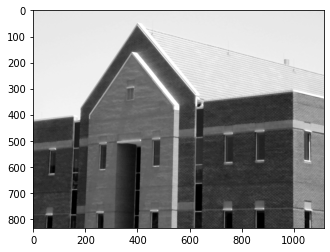

In [47]:
smooth = cv2.medianBlur(image, ksize = 5)
plt.imshow(smooth, cmap = 'gray')

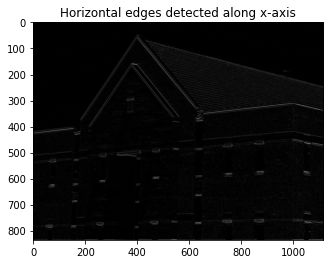

In [49]:
res_x = convolve(smooth, sobel_X, True)

plt.title("Horizontal edges detected along x-axis")
plt.imshow(res_x, cmap = 'gray')

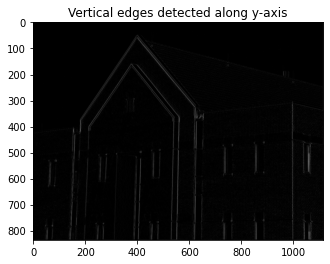

In [50]:
res_y = convolve(smooth, sobel_Y, True)

plt.title("Vertical edges detected along y-axis")
plt.imshow(res_y, cmap = 'gray')

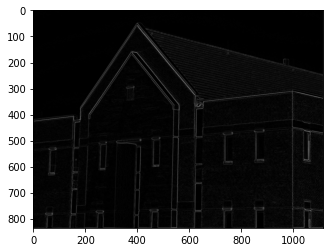

In [51]:
magn = res_x + res_y

plt.imshow(magn, cmap = 'gray')

<p> This is a much better as compared to earlier, as blurring edges filters out the less significant bricks</p>

<h2> Thresholding after edge detection </h2>

This will be helpful in removing the edges with low intensity gradients. Edges with gradient less than a 33 percent of maximum gradient intensity will be made black and rest white

In [58]:
def threshold_edges(image, percentile):
    maxi = np.amax(image)
    resimg = []
    #apply thresholding
    for pixel in image.reshape(-1):
        if pixel < (percentile *  maxi) / 100:
            resimg.append(0)
        else:
            resimg.append(255)
            
    return np.array(resimg, dtype = np.uint8).reshape(image.shape)

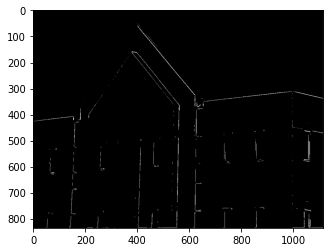

In [59]:
filters = create_kirsch_kernels()

res = kirsch_convolve(smooth, filters, padding = True)

res = threshold_edges(res, 33)

plt.imshow(res, cmap = 'gray')

<h2> Testing on another image </h2>

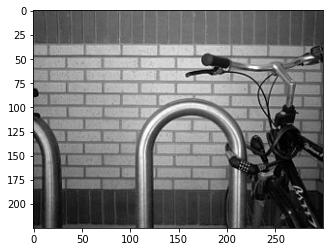

In [77]:
bike = cv2.cvtColor(cv2.imread('./images/bikes.jpg'), cv2.COLOR_BGR2GRAY)

plt.imshow(bike, cmap = 'gray')

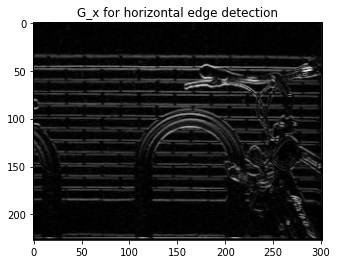

In [78]:
res_x = convolve(bike, g_x, True)
plt.title("G_x for horizontal edge detection")
plt.imshow(res_x, cmap = 'gray')

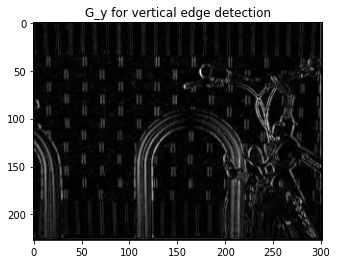

In [79]:
res_y = convolve(bike, g_y, True)
plt.title("G_y for vertical edge detection")
plt.imshow(res_y, cmap = 'gray')

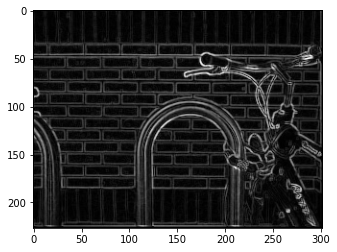

In [80]:
magn = res_x + res_y
plt.imshow(magn, cmap = 'gray')


<h2> References </h2>

[1] Gonzalez, R. C., & Woods, R. E. (2002). Digital image processing. Chapter 10, pg. 710-714<br>
[2] Bradski, G. (2000). The OpenCV Library. Dr. Dobb&#x27;s Journal of Software Tools.<br>